<a href="https://colab.research.google.com/github/Saarss-2211/projects/blob/main/DAIMONDS_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [ ]:
df = pd.read_csv("/content/diamonds.csv")
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price   

In [ ]:
#encode categorical columns
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# building a model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Step 7: Model Evaluation

def evaluate_model(y_true, y_pred, model_name):
    print(f"----- {model_name} -----")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


----- Linear Regression -----
R² Score: 0.8860134363272641
MAE: 862.9888776244613
RMSE: 1346.1144269890717

----- Random Forest -----
R² Score: 0.9999714615022904
MAE: 2.7678253615127955
RMSE: 21.299563436299284



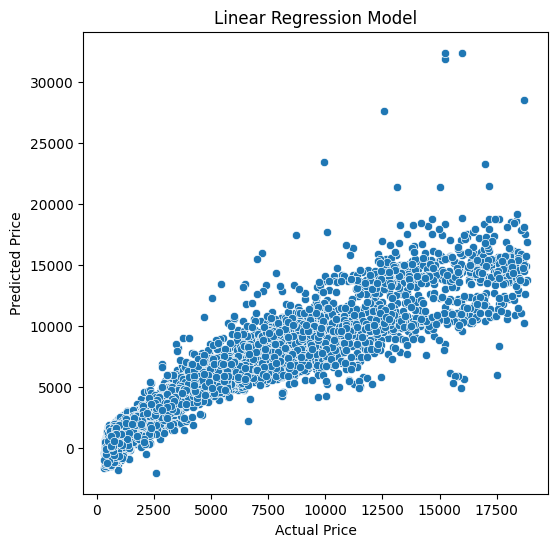

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
# Example diamond: carat, cut, color, clarity, depth, table, x, y, z
# (assuming encoded values for cut, color, clarity)

sample_diamond = [[0.8, 2, 3, 2, 61.5, 55, 5.9, 5.9, 3.6, 4.8]]
predicted_price = rf.predict(sample_diamond)
print(f"Predicted price of the diamond: ${predicted_price}")


Predicted price of the diamond: $[2783.46]
